In [1]:
from __future__ import division, absolute_import

import sys
import random
import pickle

from sklearn import metrics
import pandas as pd
import numpy as np
import h5py
from plotnine import *
from venn import venn
import seaborn as sns

#root
absPath = '/home/angela3/imbalance_pcm_benchmark/'
sys.path.insert(0, absPath)

from src.Target import Target

np.random.seed(8)
random.seed(8)

Using TensorFlow backend.


In [2]:
protein_type = "kinases"

In [3]:
strategies = ["resampling_before_clustering", "no_resampling", "resampling_after_clustering", "semi_resampling"]

ratios_df_list = []
ratios_df_dict = {}
for strategy in strategies:
    ratios_path = "".join((absPath, "data/", protein_type, "/", strategy, "/results/ratios_df.csv"))
    ratios_df = pd.read_csv(ratios_path)
    ratios_df_list.append(ratios_df)
    ratios_df_dict[strategy] = ratios_df

In [4]:
ratios_df_completo = pd.concat(ratios_df_list)

In [5]:
ratios_df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9701 entries, 0 to 2982
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               9701 non-null   int64  
 1   DeepAffinity Protein ID  9701 non-null   object 
 2   ratio_training           9503 non-null   float64
 3   ratio_test               9701 non-null   float64
 4   ratio_test_predicted     9701 non-null   float64
 5   acc                      9701 non-null   float64
 6   auroc                    7525 non-null   float64
 7   f1                       9701 non-null   float64
 8   balanced_acc             9701 non-null   float64
 9   mcc                      9701 non-null   float64
 10  strategy                 9701 non-null   object 
 11  fold                     9701 non-null   int64  
 12  Sequence                 9701 non-null   object 
 13  family                   9701 non-null   object 
 14  Uniprot ID              

In [6]:
ratios_df_completo.head()

,Unnamed: 0,DeepAffinity Protein ID,ratio_training,ratio_test,ratio_test_predicted,acc,auroc,f1,balanced_acc,mcc,strategy,fold,Sequence,family,Uniprot ID,n_interactions,len_seq
0,0,DP71,0.521739,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,resampling_before_clustering,0,MATITCTRFTEEYQLFEELGKGAFSVVRRCVKVLAGQEYAAKIINT...,PK,P11275,32,478
1,1,R7P7,0.536913,0.354167,0.458333,0.395833,0.368121,0.256410,0.372865,-0.244063,resampling_before_clustering,0,MADSGLDKKSTKCPDCSSASQKDVLCVCSSKTRVPPVLVVEMSQTS...,PK,Q9BYT3,217,514
2,2,5HXY,0.498744,0.821429,0.821429,0.857143,0.947826,0.913043,0.756522,0.513043,resampling_before_clustering,0,MAPFLRIAFNSYELGSLQAEDEANQPFCAVKMKEALSTERGKTLVQ...,PK,Q05655,578,676
3,3,5JM5,0.441327,0.571429,1.000000,0.571429,0.583333,0.727273,0.500000,0.000000,resampling_before_clustering,0,MVVFNGLLKIKICEAVSLKPTAWSLRHAVGPRPQTFLLDPYIALNV...,PK,Q02156,336,737
4,4,8XS2,0.566613,0.222997,0.655052,0.540070,0.824797,0.476190,0.681754,0.318318,resampling_before_clustering,0,MSPFLRIGLSNFDCGSCQSCQGEAVNPYCAVLVKEYVESENGQMYI...,PK,Q04759,692,706


In [7]:
ratios_df_completo.to_csv("".join((absPath, "data/", protein_type, "/ratios_df_complete.csv")))

### Question 1

#### no_resampling

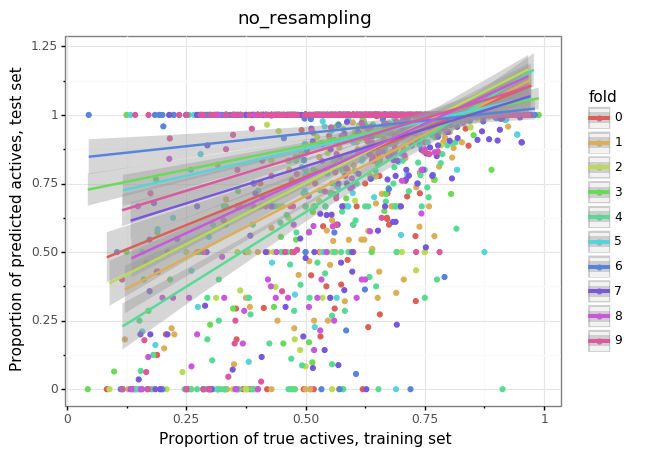

<ggplot: (8781058577072)>

In [8]:
(ggplot(ratios_df_dict["no_resampling"], aes(x="ratio_training", y="ratio_test_predicted", color="factor(fold)")) 
 + geom_point() + geom_smooth(method="lm")
+ labs(x="Proportion of true actives, training set", y="Proportion of predicted actives, test set",
      title = "no_resampling") + guides(color=guide_legend(title="fold"))

 
+ theme_bw())

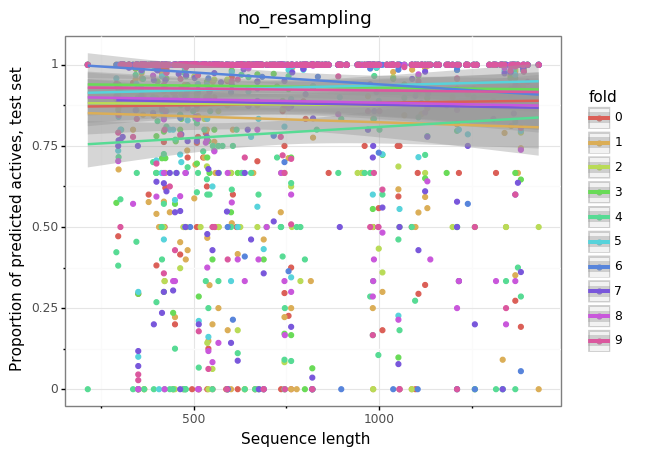

<ggplot: (8781052082703)>

In [9]:
(ggplot(ratios_df_dict["no_resampling"], aes(x="len_seq", y="ratio_test_predicted", color="factor(fold)")) 
 + geom_point() + geom_smooth(method="lm")
+ labs(x="Sequence length", y="Proportion of predicted actives, test set", title="no_resampling")
+ theme_bw() + guides(color=guide_legend(title="fold")))

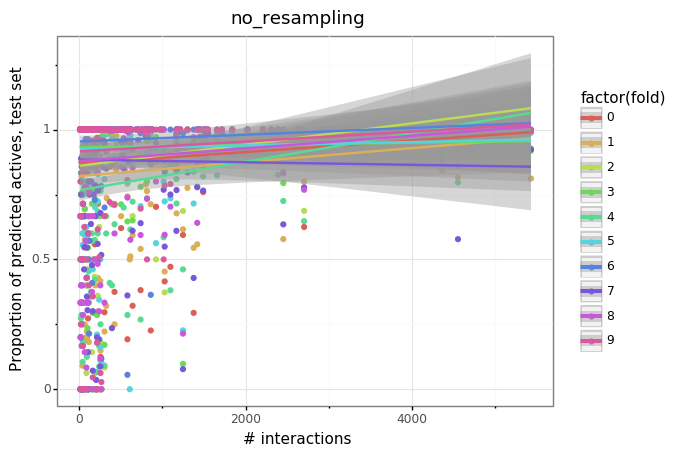

<ggplot: (8781050087067)>

In [10]:
(ggplot(ratios_df_dict["no_resampling"], aes(x="n_interactions", y="ratio_test_predicted", color="factor(fold)")) 
 + geom_point() + geom_smooth(method="lm")
+ labs(x="# interactions", y="Proportion of predicted actives, test set", title="no_resampling")
+ theme_bw())

#### resampling_after_clustering

/home/angela3/venv/lib/python3.6/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 8 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


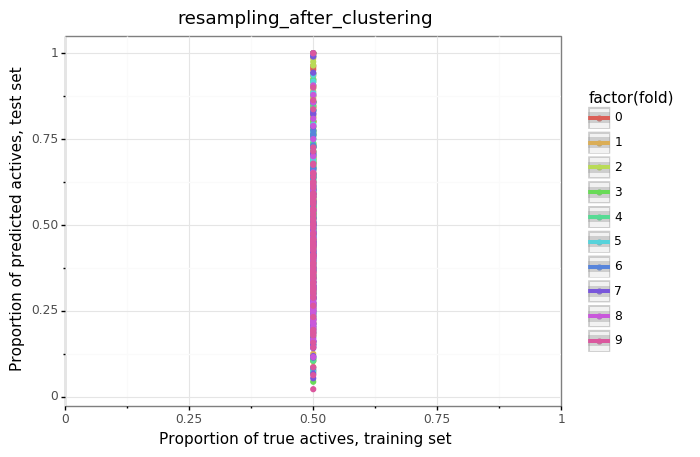

<ggplot: (8781049982542)>

In [11]:
(ggplot(ratios_df_dict["resampling_after_clustering"], aes(x="ratio_training", y="ratio_test_predicted", color="factor(fold)")) 
 + geom_point() + geom_smooth()
+ labs(x="Proportion of true actives, training set", y="Proportion of predicted actives, test set",
      title="resampling_after_clustering")
+ theme_bw())

### Question 2

/home/angela3/venv/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 16'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


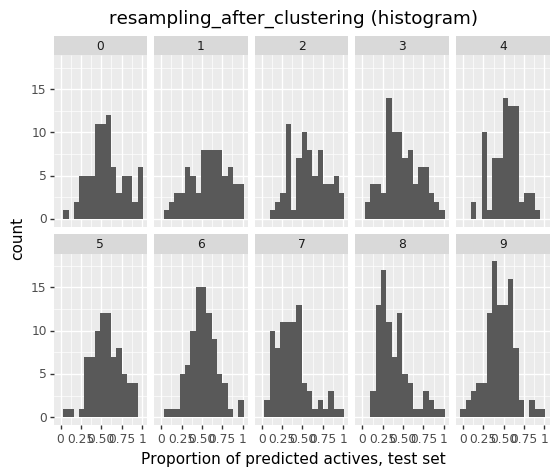

<ggplot: (-9223363255804790766)>

In [12]:
(ggplot(ratios_df_dict["resampling_after_clustering"], aes(x="ratio_test_predicted")) 
 + geom_histogram() 
 + labs(x="Proportion of predicted actives, test set",
      title="resampling_after_clustering (histogram)")
 +facet_wrap("~fold", nrow=2)
)

/home/angela3/venv/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 14'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


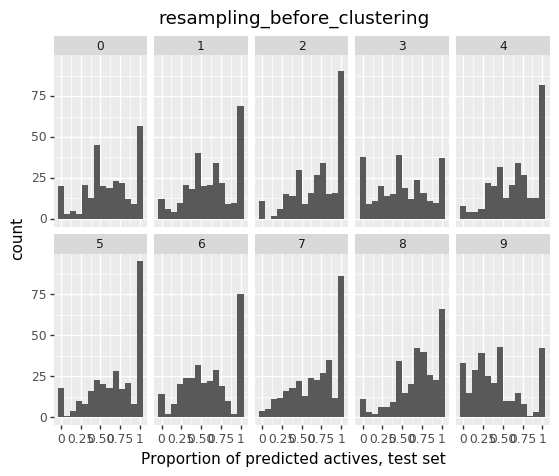

<ggplot: (-9223363255796179859)>

In [13]:
(ggplot(ratios_df_dict["resampling_before_clustering"], aes(x="ratio_test_predicted")) 
 + geom_histogram() 
 + labs(x="Proportion of predicted actives, test set",
      title="resampling_before_clustering")
 +facet_wrap("~fold", nrow=2))

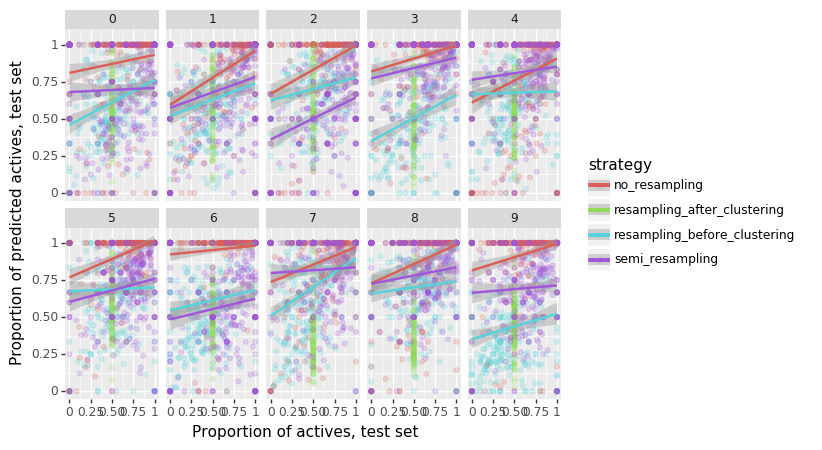

<ggplot: (-9223363255804818730)>

In [14]:
(ggplot(ratios_df_completo, aes(x="ratio_test", y="ratio_test_predicted", color="strategy")) + geom_point(alpha=0.2) 
 + geom_smooth(method="lm")
  + labs(x="Proportion of actives, test set", y="Proportion of predicted actives, test set")
 +facet_wrap("~fold", nrow=2)
)

### Question 3

/home/angela3/venv/lib/python3.6/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 198 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


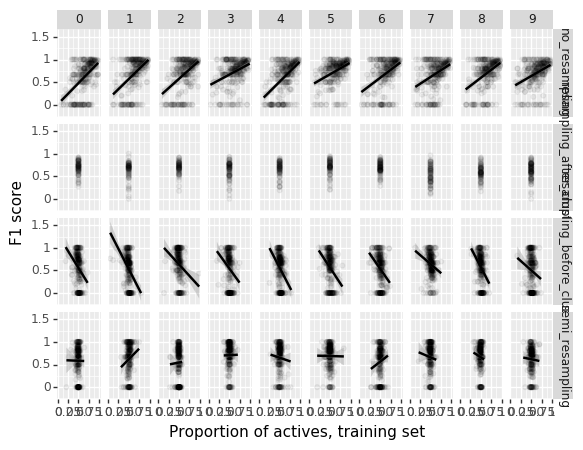

<ggplot: (8781049331923)>

In [15]:

(ggplot(ratios_df_completo, aes(y="f1", x="ratio_training")) 
 + geom_point(alpha=.05) + geom_smooth(method="lm") + facet_grid("strategy~fold")
+ labs(x="Proportion of actives, training set", y="F1 score"))

/home/angela3/venv/lib/python3.6/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 198 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


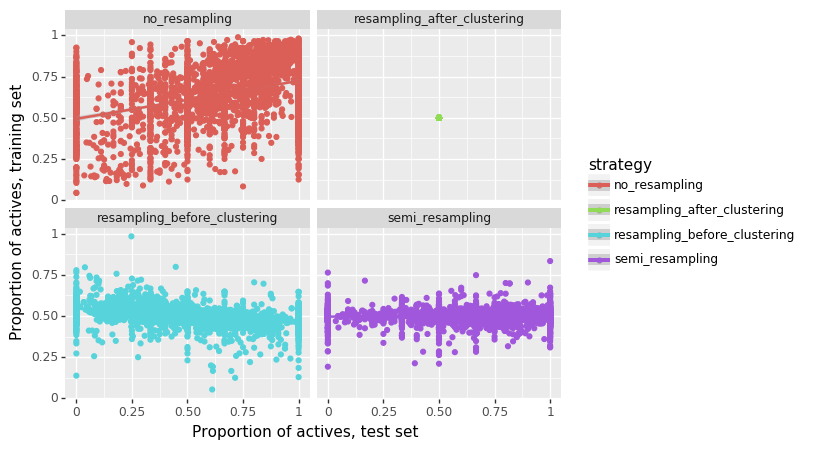

<ggplot: (8781049324478)>

In [16]:
(ggplot(ratios_df_completo, aes(y="ratio_training", x="ratio_test", color="strategy")) + geom_point() 
 + geom_smooth(method="lm") + facet_wrap("~strategy")
+ labs(x="Proportion of actives, test set", y="Proportion of actives, training set"))

In [2]:
(ggplot(ratios_df_completo, aes(y="ratio_test", x="ratio_training",)) + geom_point(alpha=.05) 
 + geom_smooth(method="lm") + facet_grid("strategy~fold")
+ labs(y="Proportion of actives, test set", x="Proportion of actives, training set"))

NameError: name 'ggplot' is not defined

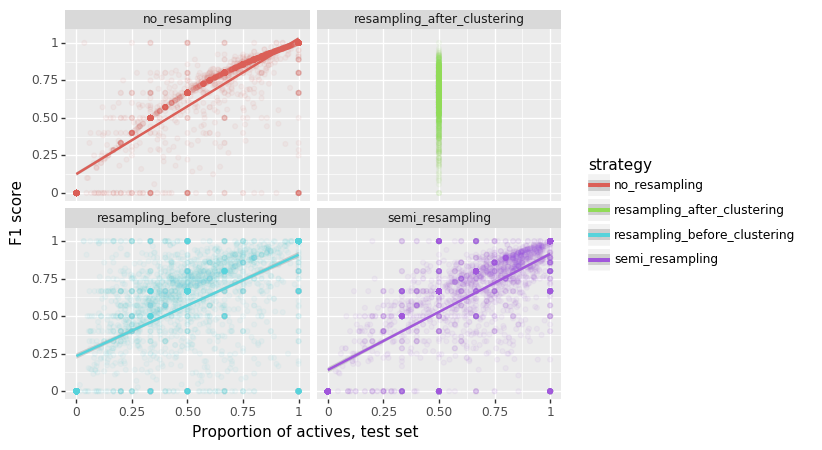

<ggplot: (-9223363255805560460)>

In [18]:
(ggplot(ratios_df_completo, aes(y="f1", x="ratio_test", color="strategy")) + geom_point(alpha=.05) 
 + geom_smooth(method="lm") + facet_wrap("~strategy")
+ labs(x="Proportion of actives, test set", y="F1 score"))

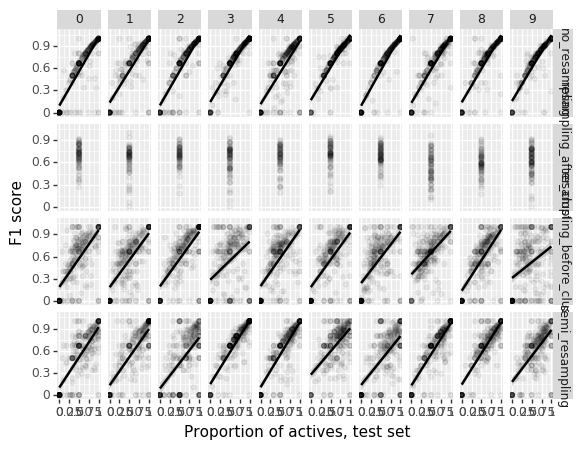

<ggplot: (-9223363255811391414)>

In [19]:
(ggplot(ratios_df_completo, aes(y="f1", x="ratio_test")) + geom_point(alpha=.05) 
 + geom_smooth(method="lm") + facet_grid("strategy~fold")
+ labs(x="Proportion of actives, test set", y="F1 score"))

/home/angela3/venv/lib/python3.6/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 2176 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


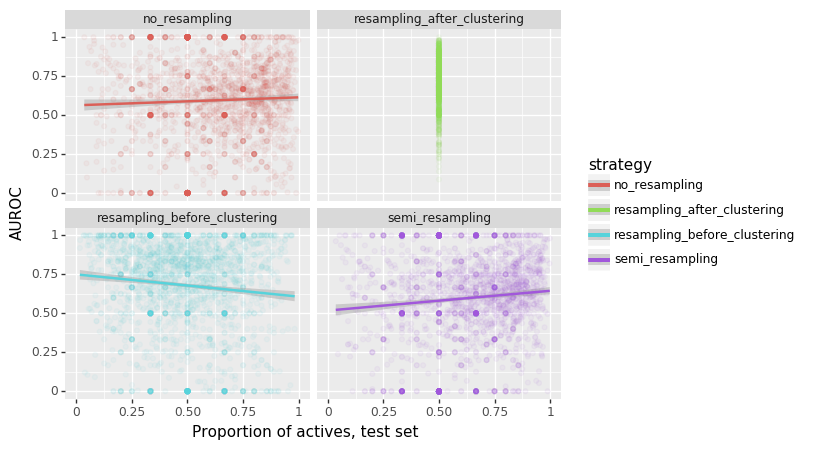

<ggplot: (-9223363255804808318)>

In [20]:
(ggplot(ratios_df_completo, aes(y="auroc", x="ratio_test", color="strategy")) + geom_point(alpha=.05) 
 + geom_smooth(method="lm") + facet_wrap("~strategy")
+ labs(x="Proportion of actives, test set", y="AUROC"))

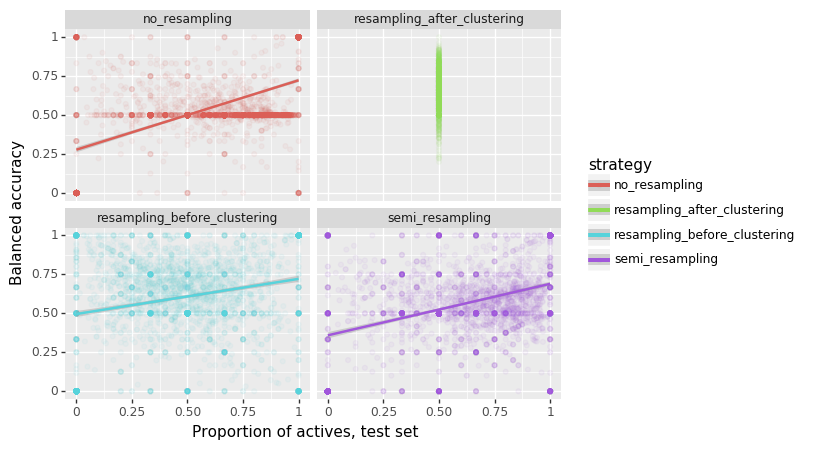

<ggplot: (-9223363255805032988)>

In [21]:
(ggplot(ratios_df_completo, aes(y="balanced_acc", x="ratio_test", color="strategy")) + geom_point(alpha=.05) 
 + geom_smooth(method="lm") + facet_wrap("~strategy")
+ labs(x="Proportion of actives, test set", y="Balanced accuracy"))

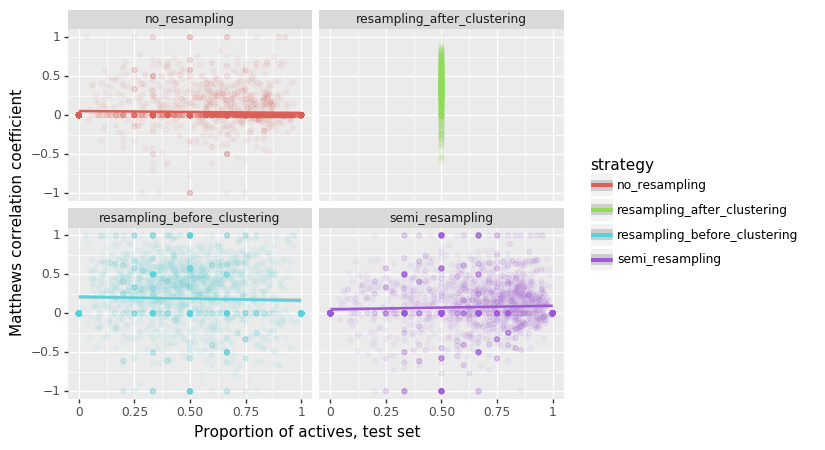

<ggplot: (-9223363255804725311)>

In [22]:
(ggplot(ratios_df_completo, aes(y="mcc", x="ratio_test", color="strategy")) + geom_point(alpha=.05) 
 + geom_smooth(method="lm") + facet_wrap("~strategy")
+ labs(x="Proportion of actives, test set", y="Matthews correlation coefficient"))

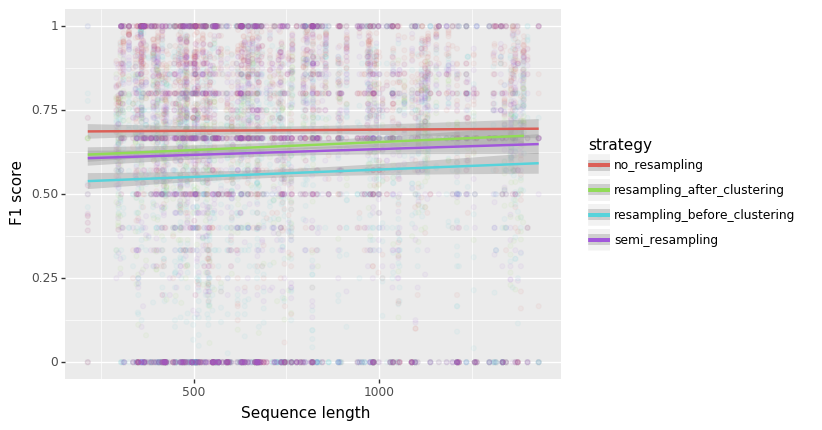

<ggplot: (-9223363255805900130)>

In [23]:
(ggplot(ratios_df_completo, aes(y="f1", x="len_seq", color="strategy")) + geom_point(alpha=.05) + geom_smooth()
+ labs(x="Sequence length", y="F1 score"))

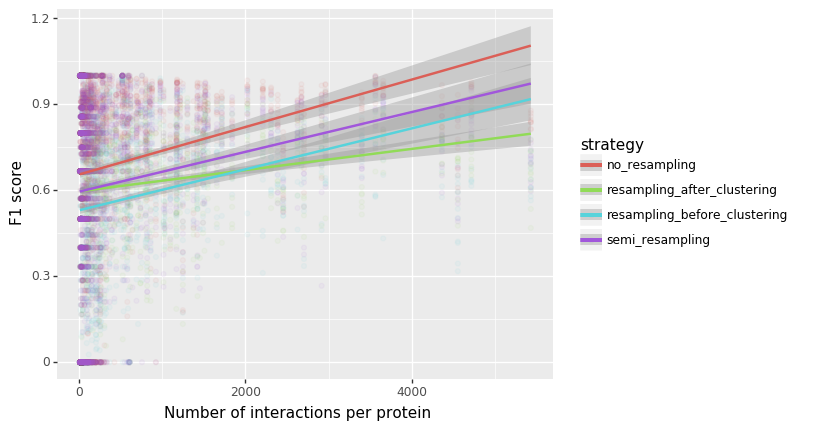

<ggplot: (8781048834799)>

In [24]:
(ggplot(ratios_df_completo, aes(y="f1", x="n_interactions", color="strategy")) + geom_point(alpha=.05) + geom_smooth()
+ labs(x="Number of interactions per protein", y="F1 score"))

In [25]:
# pivoting data

# ESTO NO LO PUEDO HACER PORQUE HAY MAS DE UN FOLD

#ratios_df_completo2 = ratios_df_completo
#ratios_df_completo2["fold"] = ratios_df_completo2["fold"].astype("str")

ratio_df_pivot = pd.pivot_table(ratios_df_completo, index=["DeepAffinity Protein ID", "fold"], columns="strategy", values="f1").reset_index()
ratio_df_pivot.head()

strategy,DeepAffinity Protein ID,fold,no_resampling,resampling_after_clustering,resampling_before_clustering,semi_resampling
0,0AXF,0,0.800000,NaN,NaN,0.800000
1,0AXF,1,1.000000,NaN,NaN,1.000000
2,0AXF,2,1.000000,NaN,0.0,0.857143
3,0AXF,3,0.857143,NaN,0.0,0.857143
4,0AXF,4,1.000000,NaN,0.4,1.000000


In [26]:
ratio_df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DeepAffinity Protein ID       3099 non-null   object 
 1   fold                          3099 non-null   int64  
 2   no_resampling                 2973 non-null   float64
 3   resampling_after_clustering   814 non-null    float64
 4   resampling_before_clustering  2911 non-null   float64
 5   semi_resampling               2973 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 145.4+ KB


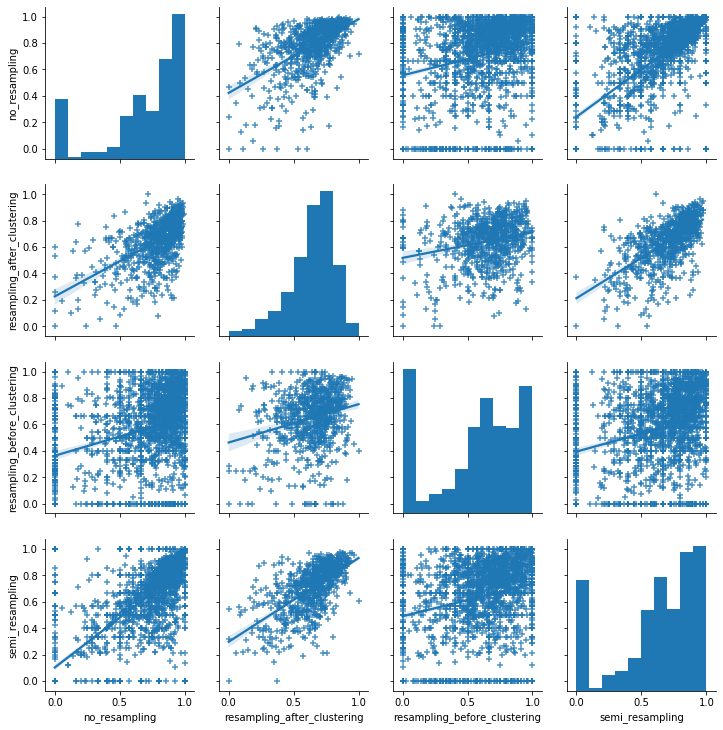

In [27]:
sns.pairplot(ratio_df_pivot[["no_resampling", "resampling_after_clustering", "resampling_before_clustering", 
                             "semi_resampling"]], kind="reg", plot_kws=dict(marker="+"))

In [ ]:
auroc_df_pivot = pd.pivot_table(ratios_df_completo, index=["DeepAffinity Protein ID", "fold"], columns="strategy", values="auroc").reset_index()
auroc_df_pivot.head()

sns.pairplot(auroc_df_pivot[["no_resampling", "resampling_after_clustering", "resampling_before_clustering", 
                             "semi_resampling"]], kind="reg", plot_kws=dict(marker="+"))

## Question 5

In [ ]:
# keeping only extreme values

df_extremes_high = ratios_df_completo[(ratios_df_completo.f1>0.95) ]
df_extremes_low = ratios_df_completo[(ratios_df_completo.f1<0.05)]

#### Low values 

In [ ]:
df_low_resampled = df_extremes_low[df_extremes_low.strategy == "resampling_before_clustering"]
df_low_noresampled = df_extremes_low[df_extremes_low.strategy == "no_resampling"]
df_low_semiresampled = df_extremes_low[df_extremes_low.strategy == "semi_resampling"]
df_low_rsmpclustering = df_extremes_low[df_extremes_low.strategy == "resampling_after_clustering"]

In [ ]:
df_extremes_low

In [ ]:
low_resampled = df_low_resampled["DeepAffinity Protein ID"].values.tolist()
low_noresampled = df_low_noresampled["DeepAffinity Protein ID"].values.tolist()
low_semiresampled = df_low_semiresampled["DeepAffinity Protein ID"].values.tolist()
low_rsmpclustering = df_low_rsmpclustering["DeepAffinity Protein ID"].values.tolist()
list_lists_low = [low_resampled, low_noresampled, low_semiresampled, low_rsmpclustering ]
low_values_list = list(set.intersection(*map(set, list_lists_low)))

proteins_low_values = {"resampling_before_clustering": set(low_resampled), "no_resampling": set(low_noresampled), 
                       "semi_resampling": set(low_semiresampled), 
                       "resampling_after_clustering":set(low_rsmpclustering)}

venn(proteins_low_values)

In [ ]:
df_high_resampled = df_extremes_high[df_extremes_high.strategy == "resampling_before_clustering"]
df_high_noresampled = df_extremes_high[df_extremes_high.strategy == "no_resampling"]
df_high_semiresampled = df_extremes_high[df_extremes_high.strategy == "semi_resampling"]
df_high_rsmpclustering = df_extremes_high[df_extremes_high.strategy == "resampling_after_clustering"]

In [ ]:
high_resampled = df_high_resampled["DeepAffinity Protein ID"].values.tolist()
high_noresampled = df_high_noresampled["DeepAffinity Protein ID"].values.tolist()
high_semiresampled = df_high_semiresampled["DeepAffinity Protein ID"].values.tolist()
high_rsmpclustering = df_high_rsmpclustering["DeepAffinity Protein ID"].values.tolist()
list_lists_high = [high_resampled, high_noresampled, high_semiresampled, high_rsmpclustering ]
high_values_list = list(set.intersection(*map(set, list_lists_high)))

proteins_low_values = {"resampling_before_clustering": set(high_resampled), "no_resampling": set(high_noresampled), 
                       "semi_resampling": set(high_semiresampled), 
                       "resampling_after_clustering":set(high_rsmpclustering)}

venn(proteins_low_values)